In [2]:
from src.models.conjugate_bayes_lin_reg import FlatPriorLinearRegression
import numpy as np
import torch
import matplotlib.pyplot as plt

In [17]:
n = 500
p = 1

# Create design matrix and response
X = np.random.randn(n, p)
X = np.hstack((np.ones((n, 1)), X))
beta = np.array([1.0, 2.0]).reshape(-1, 1)
sigma = 1.0
y = X @ beta + np.random.randn(n).reshape(-1, 1) * sigma

# Fit the model
model = FlatPriorLinearRegression()
data = {'X': torch.tensor(X, dtype=torch.float32), 'y': torch.tensor(y, dtype=torch.float32)}
model.fit(data)


/home/rnaveiro/AdvReg/src/models/conjugate_bayes_lin_reg.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu_ast = torch.tensor(v_ast @ X.T @ y, dtype=torch.float32)


In [18]:
# Predict
n_test = 100
# Grid of values for test
X_test = np.linspace(-3, 3, n_test).reshape(-1, 1)
X_test = np.hstack((np.ones((n_test, 1)), X_test))
y_test = X_test @ beta +  + np.random.randn(n_test).reshape(-1, 1) * sigma
predictive_dist = model.get_predictive_distribution(torch.tensor(X_test, dtype=torch.float32))
samples = predictive_dist.sample((10000,)).t().detach().numpy()


# Calculate the mean and 95% probability interval
mean_predictions = np.mean(samples, axis=1)
lower_bound = np.percentile(samples, 2.5, axis=1)
upper_bound = np.percentile(samples, 97.5, axis=1)



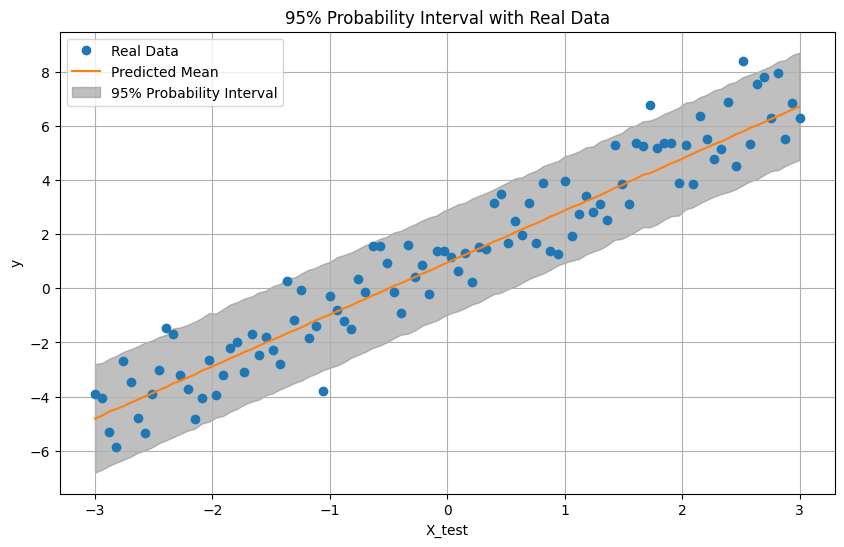

In [19]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(X_test[:, 1], y_test, 'o', label='Real Data')
plt.plot(X_test[:, 1], mean_predictions, '-', label='Predicted Mean')
plt.fill_between(X_test[:, 1], lower_bound, upper_bound, 
    color='gray', alpha=0.5, label='95% Probability Interval')
plt.xlabel('X_test')
plt.ylabel('y')
plt.title('95% Probability Interval with Real Data')
plt.legend()
plt.grid(True)
plt.show()